In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [55]:
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.15.0


## Prepare Dataset

In [99]:
# train_dataset_path = './dataset/dataset-raw-asli/train_preprocess.tsv'
# valid_dataset_path = './dataset/dataset-raw-asli/valid_preprocess.tsv'

train_dataset_path = './dataset-emosi/Clean_train_data_nostem.csv'
# valid_dataset_path = './dataset-emosi/valid_preprocess.csv'

In [100]:
# train_df = pd.read_csv(train_dataset_path, sep='\t', header=None)
# valid_df = pd.read_csv(valid_dataset_path, sep='\t', header=None)

# train_df.columns = ['text', 'label']
# valid_df.columns = ['text', 'label']

train_df = pd.read_csv(train_dataset_path, sep=',', header=None, usecols=[1,2], skiprows=1)
# valid_df = pd.read_csv(valid_dataset_path, sep=',', header=None, usecols=[0,1], skiprows=1)

train_df.columns = ['tweet', 'label']
# valid_df.columns = ['label', 'tweet']

In [101]:
train_df.head(10)

,tweet,label
0,"['pagi', 'emosi']",Anger
1,"['stabilitas', 'negara', 'memange', 'tahun', '...",Anger
2,"['emosi', 'liat']",Anger
3,"['aib', 'bodoh', 'aib', 'muncul', 'tindakan', ...",Anger
4,"['menyebalkan', 'bodoh']",Anger
5,"['asli', 'malu', 'maluin', 'indo', 'tolol', 'r...",Anger
6,"['drama', 'abg', 'tolol']",Anger
7,"['emosi', 'katla', 'kemarin', 'keterangannya',...",Anger
8,"['bangsat', 'tribute', 'no', 'bencana', 'no', ...",Anger
9,"['pergi', 'teriak', 'nangis', 'sekencang', 'ke...",Anger


In [102]:
train_df['label']

0       Anger
1       Anger
2       Anger
3       Anger
4       Anger
        ...  
7075      Sad
7076      Sad
7077      Sad
7078      Sad
7079      Sad
Name: label, Length: 7080, dtype: object

In [103]:
def get_label_idx(label):
    if label == 'Anger':
        return 0
    if label == 'Joy':
        return 1
    if label == 'Fear':
        return 2
    if label == "Love":
        return 3
    if label == "Sad":
        return 4
    if label == "Neutral":
        return 5

train_df['label'] = train_df['label'].apply(get_label_idx)
# valid_df['label'] = valid_df['label'].apply(get_label_idx)


In [104]:
unique_labels = train_df['label'].unique()
print(unique_labels)


[0 2 1 3 5 4]


In [105]:
train_df

,tweet,label
0,"['pagi', 'emosi']",0
1,"['stabilitas', 'negara', 'memange', 'tahun', '...",0
2,"['emosi', 'liat']",0
3,"['aib', 'bodoh', 'aib', 'muncul', 'tindakan', ...",0
4,"['menyebalkan', 'bodoh']",0
...,...,...
7075,"['pagi', 'seisi', 'semesta', 'sujud', 'zat', '...",4
7076,"['engkau', 'pergi', 'engkau', 'meninggalkan', ...",4
7077,"['kalah', 'tersakiti']",4
7078,"['apakabar', 'ku', 'fikiranku', 'menentu']",4


In [106]:
# join list of token as single document string
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
train_df["preprocessed"] = train_df["tweet"].apply(join_text_list)
# valid_df["preprocessed"] = valid_df["tweet_tokens_no_stemming"].apply(join_text_list)

train_df["preprocessed"].head()

0                                           pagi emosi
1    stabilitas negara memange tahun negara aman sb...
2                                           emosi liat
3    aib bodoh aib muncul tindakan kekejian sembuny...
4                                    menyebalkan bodoh
Name: preprocessed, dtype: object

## Generate Padded Sequence

In [107]:
# Parameters

vocab_size = 20000 #ukuran kosakata yang akan digunakan
max_length = 100 #panjang maksimal dari sebuah kalimat
embedding_dim = 8 #dimensi vektor embedding yang akan digunakan
trunc_type='post' #jika panjang kalimat melebihi max_length, potong bagian belakang kalimat
oov_tok = "<OOV>" #OOV (Out Of Vocabulary) token, jika suatu kata tidak ditemukan dalam kosakata

In [108]:
from sklearn.model_selection import train_test_split

# Bagi dataset menjadi data pelatihan dan data validasi
train_df, valid_df = train_test_split(train_df, test_size=0.2, random_state=42)

# Inisialisasi tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate word index dictionary untuk kalimat-kalimat pelatihan
tokenizer.fit_on_texts(train_df['preprocessed'])
word_index = tokenizer.word_index
print(word_index)

# Convert kalimat-kalimat pelatihan menjadi urutan kata
train_sequences = tokenizer.texts_to_sequences(train_df['preprocessed'])
train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating=trunc_type)

# Convert kalimat-kalimat validasi menjadi urutan kata
valid_sequences = tokenizer.texts_to_sequences(valid_df['preprocessed'])
valid_padded = pad_sequences(valid_sequences, maxlen=max_length, truncating=trunc_type)


{'<OOV>': 1, 'suka': 2, 'sedih': 3, 'semangat': 4, 'takut': 5, 'pagi': 6, 'marah': 7, 'bodoh': 8, 'bikin': 9, 'bahagia': 10, 'tuh': 11, 'kabar': 12, 'si': 13, 'malu': 14, 'anak': 15, 'sayang': 16, 'pakai': 17, 'kasih': 18, 'sepi': 19, 'cinta': 20, 'pas': 21, 'semoga': 22, 'wkwk': 23, 'emosi': 24, 'kak': 25, 'kaget': 26, 'yaa': 27, 'teman': 28, 'benci': 29, 'kecewa': 30, 'liat': 31, 'kadang': 32, 'biar': 33, 'ku': 34, 'tolol': 35, 'senang': 36, 'gini': 37, 'baca': 38, 'deh': 39, 'bilang': 40, 'kaya': 41, 'makan': 42, 'lupa': 43, 'iya': 44, 'kek': 45, 'salah': 46, 'nangis': 47, 'ngeri': 48, 'gimana': 49, 'sehat': 50, 'hati': 51, 'nonton': 52, 'sakit': 53, 'allah': 54, 'rumah': 55, 'bangun': 56, 'bangsat': 57, 'tidur': 58, 'waktu': 59, 'kemarin': 60, 'hidup': 61, 'kesal': 62, 'diam': 63, 'happy': 64, 'foto': 65, 'selamat': 66, 'denise': 67, 'beli': 68, 'eh': 69, 'cewek': 70, 'terima': 71, 'lagu': 72, 'bicara': 73, 'bagus': 74, 'alhamdulillah': 75, 'cepat': 76, 'tahun': 77, 'cowok': 78, 'p

In [75]:
# ## Tokenization
# tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# # Generate word index dictionary for the training sentences
# tokenizer.fit_on_texts(train_df['preprocessed'])
# word_index = tokenizer.word_index
# print(word_index)

# # Convert the training sentences into word sequences
# train_sequences = tokenizer.texts_to_sequences(train_df['preprocessed'])
# train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating=trunc_type)

# # Convert the validation sentences into word sequences
# valid_sequences = tokenizer.texts_to_sequences(valid_df['tweet'])
# valid_padded = pad_sequences(valid_sequences, maxlen=max_length, truncating=trunc_type)

{'<OOV>': 1, 'suka': 2, 'sedih': 3, 'semangat': 4, 'takut': 5, 'pagi': 6, 'marah': 7, 'bodoh': 8, 'bikin': 9, 'bahagia': 10, 'tuh': 11, 'malu': 12, 'kabar': 13, 'pakai': 14, 'sayang': 15, 'pas': 16, 'si': 17, 'anak': 18, 'sepi': 19, 'cinta': 20, 'kasih': 21, 'semoga': 22, 'kaget': 23, 'emosi': 24, 'kak': 25, 'wkwk': 26, 'yaa': 27, 'teman': 28, 'benci': 29, 'kecewa': 30, 'liat': 31, 'ku': 32, 'tolol': 33, 'kadang': 34, 'senang': 35, 'biar': 36, 'iya': 37, 'gini': 38, 'baca': 39, 'makan': 40, 'kek': 41, 'kaya': 42, 'deh': 43, 'salah': 44, 'sakit': 45, 'lupa': 46, 'bilang': 47, 'ngeri': 48, 'rumah': 49, 'gimana': 50, 'bangsat': 51, 'nangis': 52, 'nonton': 53, 'allah': 54, 'hati': 55, 'sehat': 56, 'waktu': 57, 'kemarin': 58, 'bangun': 59, 'tidur': 60, 'beli': 61, 'kesal': 62, 'hidup': 63, 'lagu': 64, 'diam': 65, 'bagus': 66, 'selamat': 67, 'happy': 68, 'cewek': 69, 'eh': 70, 'cowok': 71, 'denise': 72, 'bicara': 73, 'foto': 74, 'terima': 75, 'alhamdulillah': 76, 'panik': 77, 'coba': 78, 'ce

In [ ]:
# Split Dataset


In [116]:
# import pickle

# # Simpan tokenizer ke dalam file
# with open('tokenizer-3classes-no-stemming.pickle', 'wb') as handle:
#     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [86]:
print(train_padded[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  969 2248]


## Word Embedding

In [109]:
from gensim.models import Word2Vec

sentences = [sentence.split() for sentence in train_df['preprocessed']]
w2v_model = Word2Vec(sentences, vector_size=8, window=5, min_count=5, workers=4)

In [110]:
# Create a weight matrix for the embedding layer
embedding_matrix = np.zeros((vocab_size, 8))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

In [111]:
# Mencari kata berdasarkan vektor tertentu
def find_word_by_vector(embedding_matrix, vector):
    for word, index in word_index.items():
        if np.array_equal(embedding_matrix[index], vector):
            return word, embedding_matrix[index]
    return None

# Contoh: Mencari kata untuk vektor embedding_matrix[3]
word = find_word_by_vector(embedding_matrix, embedding_matrix[1000])
print(word)

('bonus', array([-0.04761499, -0.0603355 ,  0.26783463,  0.06003844,  0.14204971,
       -0.06658552,  0.44494453, -0.07952542]))


## Build and Compile Model

In [117]:


model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 8, embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix), input_shape=(max_length,), trainable=False),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ (None, 100, 8)            │    160,000 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lstm (LSTM)                     │ (None, 128)               │     70,144 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_20 (Dense)                │ (None, 16)                │      2,064 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_10 (Dropout)            │ (None, 16)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_21 (Dense)                │ (None, 6)                 │        102 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 232,310 (907.46 KB)

 Trainable params: 232,310 (907.46 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Looping untuk mendapatkan bobot dari setiap layer
for layer in model.layers:
    # Mengecek apakah layer memiliki bobot
    if layer.weights:
        print("Layer Name:", layer.name)
        # Mendapatkan bobot dan bias dari layer
        weights = layer.get_weights()
        for i, w in enumerate(weights):
            print("Weights Shape (Tensor {}):".format(i), w.shape)
            print("Weights (Tensor {}):".format(i))
            print(w)


Layer Name: embedding_2
Weights Shape (Tensor 0): (20000, 8)
Weights (Tensor 0):
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.7925338   0.44368407 -1.4986229  ... -0.29176432  1.9843866
  -1.0779631 ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
Layer Name: conv1d_2
Weights Shape (Tensor 0): (5, 8, 128)
Weights (Tensor 0):
[[[-0.05449156  0.04225601  0.05771114 ... -0.04051568  0.07256202
    0.04332797]
  [ 0.0804143   0.04597403 -0.0890969  ... -0.02126928 -0.01336995
   -0.0094852 ]
  [-0.00253936  0.03977625 -0.05215891 ...  0.01530539 -0.01818667
   -0.0336596 ]
  ...
  [ 0.00842703 -0.05430722 -0.04538939 ... -0.00849218  0.04865061
   -0.02399287]
  [-0.04176873 -0.00273452  0.0173673  ...  0.06603

## Train Model

In [118]:
num_epochs = 10

history = model.fit(train_padded, train_df['label'], epochs=num_epochs, validation_data=(valid_padded, valid_df['label']), verbose=2)


Epoch 1/10
177/177 - 17s - 94ms/step - accuracy: 0.2731 - loss: 1.7580 - val_accuracy: 0.2761 - val_loss: 1.7229
Epoch 2/10
177/177 - 15s - 83ms/step - accuracy: 0.3012 - loss: 1.6933 - val_accuracy: 0.3206 - val_loss: 1.6180
Epoch 3/10
177/177 - 17s - 95ms/step - accuracy: 0.3466 - loss: 1.5663 - val_accuracy: 0.3948 - val_loss: 1.4616
Epoch 4/10
177/177 - 16s - 88ms/step - accuracy: 0.4013 - loss: 1.4323 - val_accuracy: 0.5247 - val_loss: 1.3084
Epoch 5/10
177/177 - 16s - 88ms/step - accuracy: 0.5117 - loss: 1.2355 - val_accuracy: 0.5749 - val_loss: 1.2054
Epoch 6/10
177/177 - 15s - 87ms/step - accuracy: 0.6050 - loss: 1.0807 - val_accuracy: 0.5756 - val_loss: 1.2108
Epoch 7/10
177/177 - 15s - 87ms/step - accuracy: 0.6522 - loss: 0.9116 - val_accuracy: 0.5968 - val_loss: 1.1506
Epoch 8/10
177/177 - 17s - 97ms/step - accuracy: 0.7099 - loss: 0.7891 - val_accuracy: 0.6059 - val_loss: 1.2930
Epoch 9/10
177/177 - 15s - 85ms/step - accuracy: 0.7415 - loss: 0.6973 - val_accuracy: 0.6081 - 

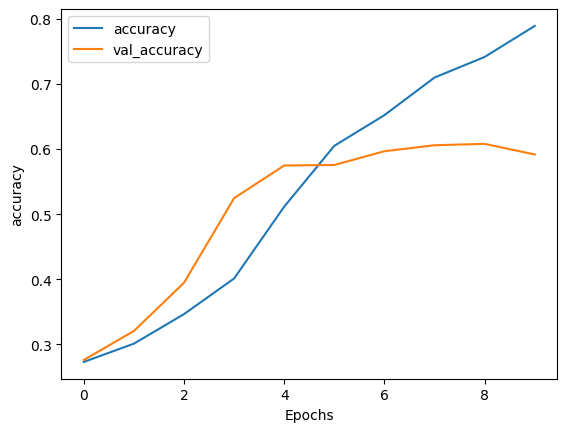

In [119]:
# Plot the training history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")

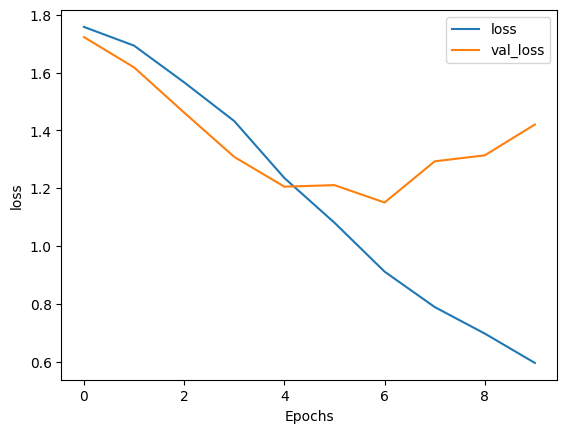

In [120]:
# Plot the training history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "loss")

In [43]:
## test model with predict one example sentence
sample_text = ["Selama ini memang pelayanan BCA selalu memuaskan."]
sample_seq = tokenizer.texts_to_sequences(sample_text)
sample_padded = pad_sequences(sample_seq, maxlen=max_length, truncating=trunc_type)
print(model.predict(sample_padded))

## convert predict to label
def get_label(predict):
    if predict == 2:
        return 'positive'
    if predict == 1:
        return 'negative'
    if predict == 0:
        return 'neutral'
    
print(get_label(np.argmax(model.predict(sample_padded))))    



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
[[0.14023599 0.40221536 0.4575486 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
positive


In [121]:
from sklearn.metrics import classification_report

# Melakukan prediksi pada data uji
y_pred = model.predict(valid_padded)
y_pred_classes = np.argmax(y_pred, axis=1)

print (y_pred_classes.shape)
print (y_pred.shape)

# Mencetak classification report
print(classification_report(valid_df["label"], y_pred_classes))

45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step
(1416,)
(1416, 6)
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       233
           1       0.60      0.60      0.60       253
           2       0.76      0.66      0.71       195
           3       0.60      0.58      0.59       153
           4       0.44      0.48      0.46       193
           5       0.54      0.55      0.54       389

    accuracy                           0.59      1416
   macro avg       0.60      0.59      0.60      1416
weighted avg       0.60      0.59      0.59      1416



In [45]:
#save model
model.save('./model/model-cnn-word2vec-3-classes-no-stemming.h5')

In [100]:
import numpy as np
import tensorflow as tf

# Inisialisasi bobot kernel dengan ukuran 5
kernel_size = 5
num_filters = 1
embedding_dim = 8

# Membuat bobot kernel dengan inisialisasi Glorot uniform
initializer = tf.keras.initializers.GlorotUniform()
kernel_weights = initializer(shape=(kernel_size, embedding_dim, num_filters))

# Dibulatkan ke angka terdekat
kernel_weights_rounded = np.round(kernel_weights, decimals=2)

print("Bobot kernel dengan inisialisasi Glorot uniform (dibulatkan):")
print(kernel_weights_rounded)
print("Shape bobot kernel:", kernel_weights.shape)


Bobot kernel dengan inisialisasi Glorot uniform (dibulatkan):
[[[-0.19]
  [ 0.32]
  [ 0.33]
  [-0.01]
  [-0.2 ]
  [ 0.18]
  [-0.13]
  [ 0.36]]

 [[ 0.03]
  [-0.32]
  [-0.19]
  [-0.09]
  [-0.18]
  [-0.15]
  [-0.02]
  [-0.29]]

 [[-0.16]
  [-0.34]
  [-0.08]
  [-0.25]
  [-0.15]
  [ 0.28]
  [ 0.31]
  [ 0.17]]

 [[-0.2 ]
  [ 0.16]
  [ 0.36]
  [-0.21]
  [ 0.13]
  [-0.18]
  [ 0.31]
  [ 0.1 ]]

 [[ 0.35]
  [ 0.32]
  [ 0.13]
  [ 0.2 ]
  [-0.09]
  [-0.01]
  [ 0.07]
  [-0.17]]]
Shape bobot kernel: (5, 8, 1)
